In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42942_U')

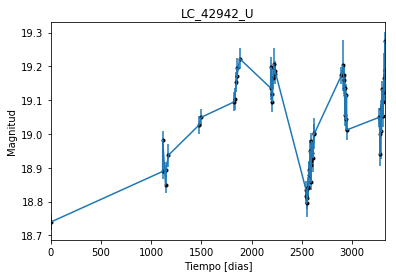

In [2]:
data = np.genfromtxt('LC_42942_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42942_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

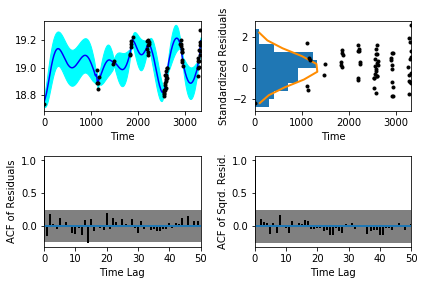

In [5]:
sample.assess_fit()

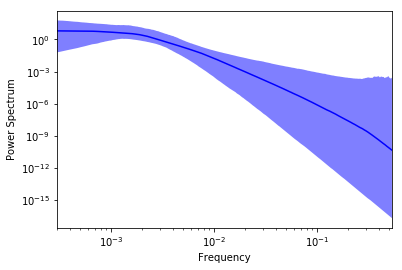

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42942_U')

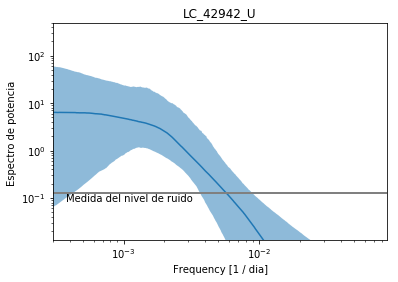

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42942_U')

Text(0.5,1,'Prediccion , valor esperado LC_42942_U')

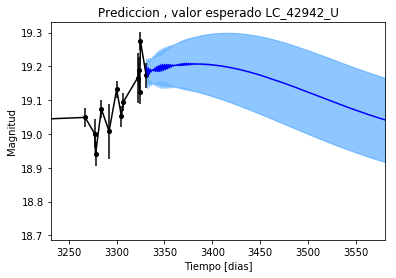

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42942_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42942_U')

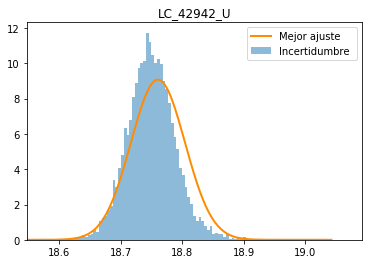

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42942_U')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_U')

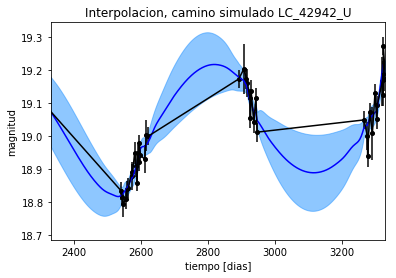

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_U')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_U')

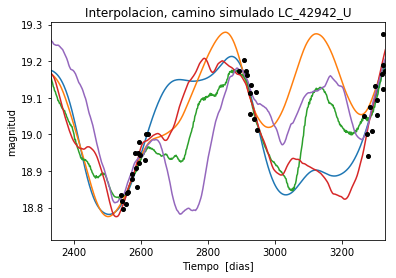

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 587.443285854
Median: 0.0060486466396
Standard deviation: 0.169305029722
68% credibility interval: [ 0.00067738  0.10184184]
95% credibility interval: [  3.41302991e-04   6.90576122e-01]
99% credibility interval: [  3.10709429e-04   9.91043948e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 964.516371048
Median: 0.00267133480682
Standard deviation: 0.0831921050844
68% credibility interval: [ 0.00058171  0.02795531]
95% credibility interval: [ 0.00033303  0.23846322]
99% credibility interval: [  3.07751479e-04   6.04619291e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 231.540655764
Median: 0.00761968589514
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 772.929041934
Median: 113.431623778
Standard deviation: 1.85529281107
68% credibility interval: [ 111.59225728  114.85821371]
95% credibility interval: [ 108.99529653  116.87804802]
99% credibility interval: [ 106.87666271  118.02010665]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 960.001693195
Median: 0.383542809336
Standard deviation: 1.99149854352
68% credibility interval: [ 0.04256283  2.94172478]
95% credibility interval: [ 0.01319389  6.79546062]
99% credibility interval: [  9.26506054e-03   9.53978876e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 347.666142157
Median: 0.5239284335
Standard deviation: 10.3706877297
68% credibility interval: [  9.15288404e-03   1.22012953e+01]
95% credibility interval

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310433
Median: 2.52250022665e-12
Standard deviation: 2.32896000875e+51
68% credibility interval: [  4.41118440e-53   1.26541805e+11]
95% credibility interval: [  2.99546998e-78   6.21607436e+36]
99% credibility interval: [  1.75932886e-85   2.10317389e+42]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2569.89266877
Median: 19.0285361929
Standard deviation: 0.0793220665477
68% credibility interval: [ 18.96349014  19.08897718]
95% credibility interval: [ 18.85609532  19.181746  ]
99% credibility interval: [ 18.75309852  19.27338041]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 162.730058093
Median: 0.0305715434953
Standard deviation: 0.279860470139
68% credibility interval: [ 0.         0.5180751]
95% credibility interval: [ 0.          0.93518338]
99% credibility interval: [ 0.          1.03937338]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 162.730058093
Median: 0.0305715434953
Standard deviation: 0.279860470139
68% credibility interval: [ 0.         0.5180751]
95% credibility interval: [ 0.          0.93518338]
99% credibility interval: [ 0.          1.03937338]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 859.588799397
Median: 0.0
Standard deviation: 0.000927659608882
68% credib

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 772.929041934
Median: 113.431623778
Standard deviation: 1.85529281107
68% credibility interval: [ 111.59225728  114.85821371]
95% credibility interval: [ 108.99529653  116.87804802]
99% credibility interval: [ 106.87666271  118.02010665]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1042.03885106
Median: 0.0311942569966
Standard deviation: 0.0417499436301
68% credibility interval: [ 0.01923602  0.05765237]
95% credibility interval: [ 0.01240434  0.12365083]
99% credibility interval: [ 0.00948554  0.25051177]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 876.929010695
Median: 1.33338290193
Standard deviation: 0.231781100872
68% credibility interval: [ 1.11129474  1.56525958]
95% credibility interval: [ 0.87816439  1.80845054]
99% credibility interval: [ 0.7524842   1.93696737]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 338.768211811
Median: 0.00015401398495
Standard deviation: 0.206434202602
68% credibility interval: [  8.76005090e-16   1.08749177e-02]
95% credibility interval: [  6.58224848e-41   3.54652993e-01]
99% credibility interval: [  2.12968213e-47   1.03617866e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 587.443285854
Median: (-0.0380047676942-2.54257940872j)
Standard deviation: 2.05514986794
68% credibility interval: [-0.63989113-3.15586119j -0.00425608-1.93430752j]
95% credibility interval: [ -4.33901774e+00+0.j          -2.14446994e-03-0.20193418j]
99% credibility interval: [ -6.22691277e+00+0.j          -1.95224492e-03-0.18370148j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 964.516371048
Median: (-0.0167844916087+2.32723829386j)
Standard deviation: 1.83446210515
68% credibility interval: [-0.17564841+0.27131894j -0.00365498+6.09092254j]
95% credibility interval: [-1.49830861+1.06433374j -0.00209247+0.01484766j]
99% credibility interval: [ -3.79893505e+00+5.65108864j  -1.93365957e-03+1.08711183j]
Posterior summ